We are going to be using tensorflow and keras to build a classification model.

The dataset we are using is a fashion MNIST dataset which contains images of different clothes.  

In [ ]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()



4423680/4422102 [==============================] - 0s 0us/step


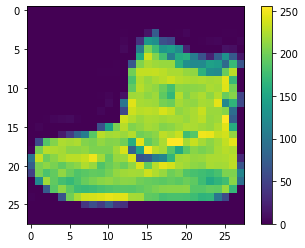

9


In [ ]:

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

print(test_labels[0])

Each image in this dataset has pixel values between 0 and 255. So we are going to normalize this data to get the values between 0 and 1.


9 Ankle boot
0 T-shirt/top
0 T-shirt/top
3 Dress
0 T-shirt/top
2 Pullover
7 Sneaker
2 Pullover
5 Sandal
5 Sandal
0 T-shirt/top
9 Ankle boot
5 Sandal
5 Sandal
7 Sneaker
9 Ankle boot
1 Trouser
0 T-shirt/top
6 Shirt
4 Coat


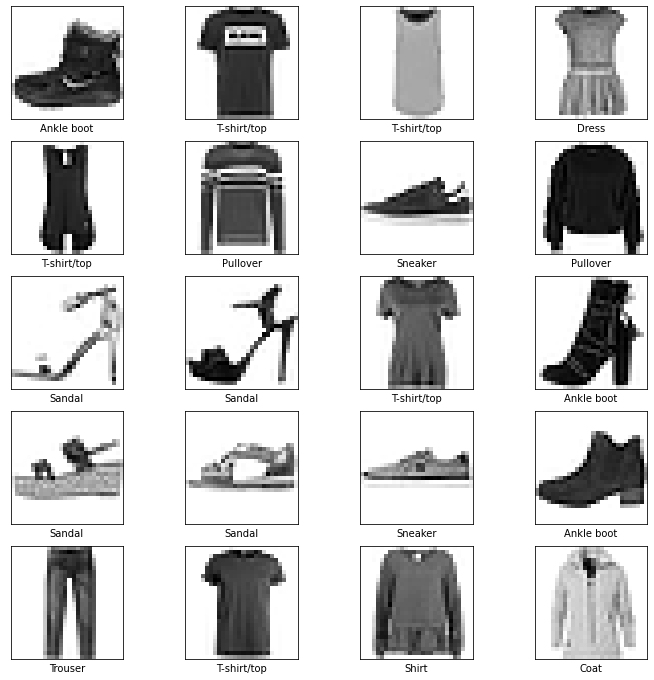

In [ ]:

train_images = train_images / 255.0
test_images = test_images / 255.0


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# here we are trying to display few images from training set with its labels
plt.figure(figsize=(12,12))
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    print(train_labels[i],class_names[train_labels[i]])
plt.show()




Now we are going to set up our layers for our neural network.



In [ ]:
model = keras.Sequential(
    [
     keras.layers.Flatten(input_shape=(28,28)),
     keras.layers.Dense(128,activation='relu'),
     keras.layers.Dense(10)
    ])



In [ ]:
'''
 this crossentropy loss function is used when there are two or
  more label classes. We expect labels to be provided as integers.
'''
#loss = tf.keras.losses.sparse_categorical_crossentropy(from_logits=True),
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epoc = 10
print(test_images.shape)
#Fitting the model
model.fit(train_images,train_labels,epochs = epoc)

#Evaluating accuracy
test_loss,test_accuracy = model.evaluate(test_images, test_labels,verbose=1)
print('test accuracy: ',test_accuracy,'/ntest loss : ',test_loss)


(10000, 28, 28)
Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6351 - accuracy: 0.7771
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3934 - accuracy: 0.8603
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3471 - accuracy: 0.8758
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3168 - accuracy: 0.8839
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2966 - accuracy: 0.8925
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2792 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2662 - accuracy: 0.9015
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2517 - accuracy: 0.9058
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2413 - accuracy: 0.9102
Epoch 10/10
313/313 [==============================] - 0s 1ms/step

In [ ]:
probability_model = tf.keras.Sequential([ model,tf.keras.layers.Softmax()])
predictions =probability_model.predict(test_images)
print(predictions[0])

for i in range(10):
    print(np.argmax(predictions[i])," -> ", test_labels[i])

[5.4596526e-06 9.6921360e-10 5.8624593e-08 2.0164605e-10 8.4484327e-08
 1.0076105e-02 1.4592217e-06 7.1373142e-02 1.3171497e-06 9.1854244e-01]
9  ->  9
2  ->  2
1  ->  1
1  ->  1
6  ->  6
1  ->  1
4  ->  4
6  ->  6
5  ->  5
7  ->  7


In [ ]:
def plot_image(i, prediction_array, true_label,img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(prediction_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(prediction_array),
                                         class_names[true_label],
                                         ),color=color)
    
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = '#777777')
    plt.ylim(0,1)
    predicted_label =np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')



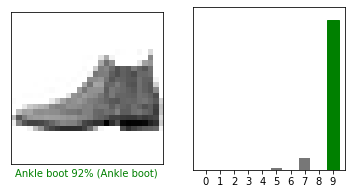

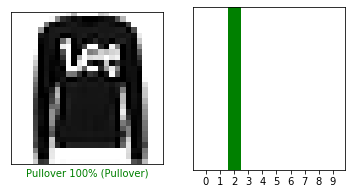

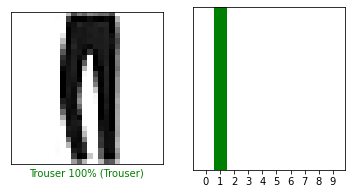

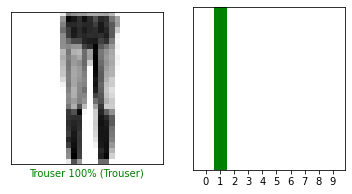

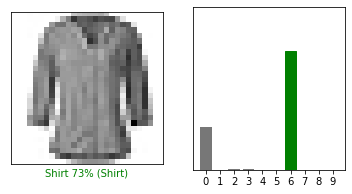

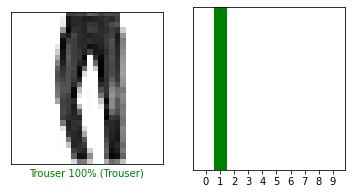

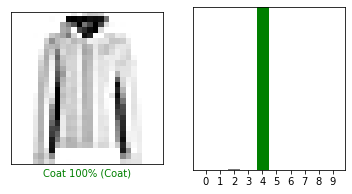

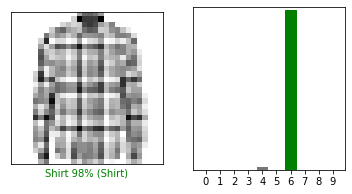

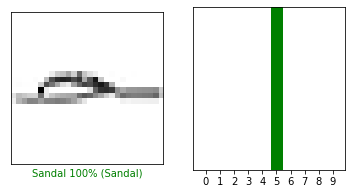

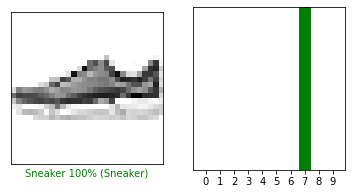

In [ ]:

for i in range(10):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i,predictions[i], test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i], test_labels)
    plt.show